# Advertising Sales Channel Prediction

## Problem Statement:


When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

The below link provided is for downloading the dataset. 

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [12]:
# Import data
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

In [13]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [14]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [15]:
# Check null values
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [16]:
# More information, data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [17]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [18]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


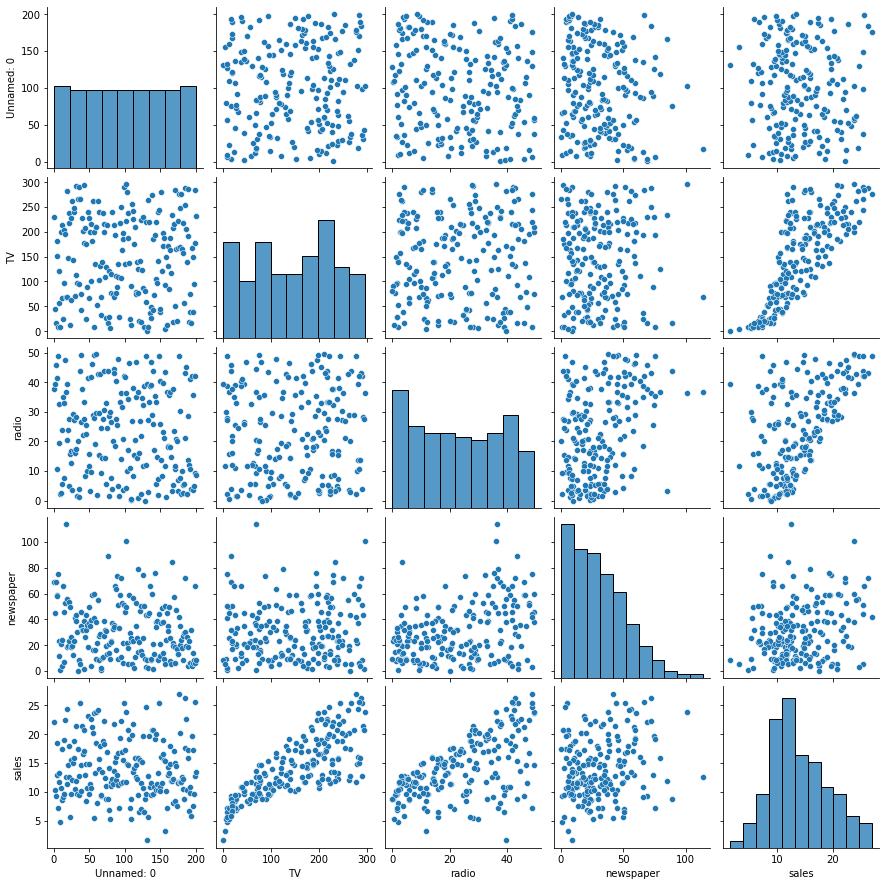

In [20]:
# Graphs
sns.pairplot(df)

<AxesSubplot:>

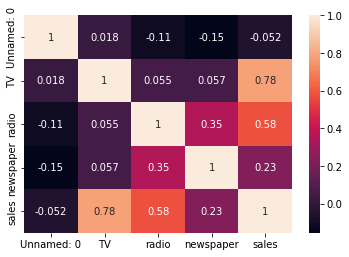

In [21]:
#Correlations
sns.heatmap(df.corr(), annot=True)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TV', ylabel='Density'>

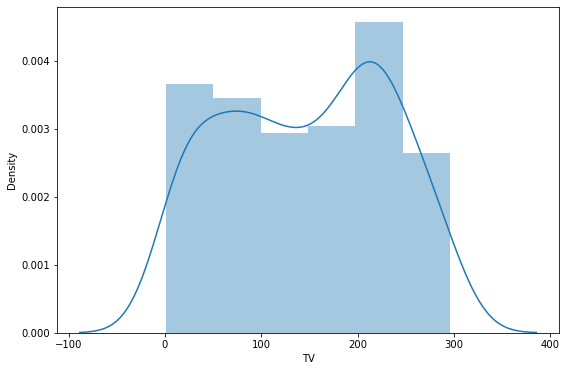

In [22]:
#Data distribution of each variable
plt.figure(figsize=(9,6))
sns.distplot(df['TV'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='radio', ylabel='Density'>

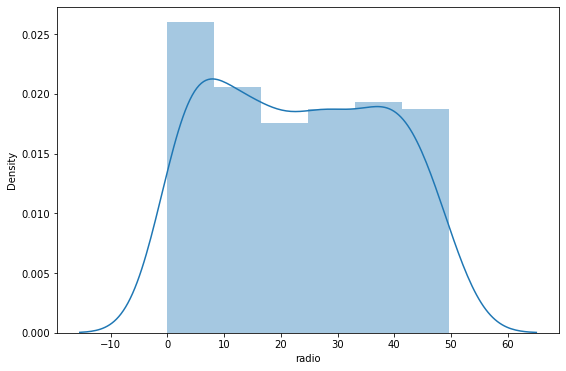

In [23]:
#Data distribution of each variable
plt.figure(figsize=(9,6))
sns.distplot(df['radio'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='newspaper', ylabel='Density'>

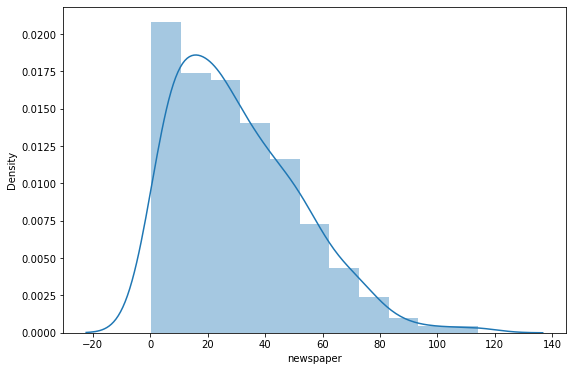

In [24]:
plt.figure(figsize=(9,6))
sns.distplot(df['newspaper'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


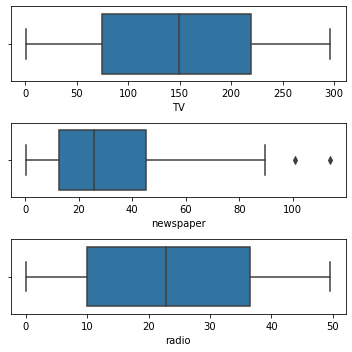

In [25]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt.tight_layout()

In [26]:
# Dividing data in train-test
X = df[['TV','radio','newspaper']].values
y = df['sales'].values

In [27]:
print(X.shape)
print(y.shape)

(200, 3)
(200,)


In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [30]:
# Define model
linereg = LinearRegression()

In [32]:
#Fitting the model
linereg.fit(X_train,y_train)

LinearRegression()

In [33]:
#coefficients of model
linereg.coef_

array([0.04416235, 0.19900368, 0.00116268])

In [34]:
# Intercept
linereg.intercept_

2.89257005115115

In [37]:
# Predicting 
y_predict = linereg.predict(X_test)

In [36]:
# Prediction
y_predict

array([10.0494569 ,  7.43052335,  6.97152143, 24.16378667, 12.00215643,
        6.54334645, 13.09526331, 14.95879164, 11.00528358, 16.27234553,
       22.99324688,  9.12188347, 10.33545333, 15.39628185, 11.60589932,
       12.11484332, 18.60251172, 10.81414474, 16.07541355, 17.22753644,
       24.2342995 ,  9.47711838, 15.13960412, 12.41064749,  5.67814427,
       15.22889947, 12.21635459, 20.94370559, 13.28068231,  9.16578351,
       13.30285718, 21.5770033 , 18.098111  , 21.15572322,  6.69734039,
        6.15355714,  7.96280151, 13.09426248, 14.81032968,  6.22020075,
       12.2799744 ,  9.1817324 , 15.04882696, 16.26091437, 17.16859664,
       13.32831849,  3.69143664, 12.43931798, 15.87909695,  8.68626862])

In [38]:
# Model Evaluation
print("Mean Abs Error :",metrics.mean_absolute_error(y_test,y_predict))
print("Mean Sq Error  :",metrics.mean_squared_error(y_test,y_predict))
print("Root Mean Sq Error :",np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print("r2 value   :",metrics.r2_score(y_test,y_predict))

Mean Abs Error : 1.300032091923545
Mean Sq Error  : 4.012497522917099
Root Mean Sq Error : 2.0031219440955406
r2 value   : 0.8576396745320893
